# Batch creation of Groups

This sample notebook automates the task of creating groups in a Portal for ArcGIS or ArcGIS Online organization. A similar script can be used for creating or updating users and content.

**Note**: To run this sample, you need the ``pandas`` library in your conda environment. If you don't have the library, install it by running the following command from cmd.exe or your shell
```
conda install pandas```

In [ ]:
from arcgis.gis import GIS
from IPython.display import display
import pandas as pd

## Data preparation

In this sample, a list of groups to be created is read from a .csv file along with the properties and thumbnails to be used for creating the groups.

In [ ]:
groups_df = pd.read_csv('data/groups.csv')

In [ ]:
groups_df[:3]

,access,description,isFav,isInvitationOnly,isViewOnly,phone,snippet,sortField,sortOrder,tags,thumbnail,title
0,public,This group includes a complete list of basemap...,False,True,True,null,Standard basemaps for our organizations.,title,asc,"Maps,Base,Basemap,Basemaps",data/Icons/Basemaps.png,Basemaps
1,org,This Group contains an inventory of map servic...,False,False,False,null,The authoritative service catalog.,title,asc,"Services,Maps,Data",data/Icons/CentralServices.png,Central Services
2,org,A group dealing with government and industry a...,False,False,False,null,Regulatory compliance tracking & reporting.,modified,asc,"Regulatory,Compliance",data/Icons/RegCompliance.png,Compliance


 The thumbnails are extracted from an Icons.zip file. 

In [ ]:
import zipfile
with zipfile.ZipFile("data/Icons.zip") as z:
    z.extractall("data")

The code below reads the csv file line by line and creates groups in the portal using the specified parameters and thumbnails.

In [ ]:
import csv

gis = GIS("https://python.playground.esri.com/portal", "arcgis_python", "amazing_arcgis_123")

groups = []
with open('data/groups.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        group = gis.groups.create_from_dict(row)
        groups.append(group)
        

To verify, we can display the newly created groups:

<Group title:"Basemaps" owner:arcgis_python>
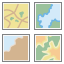

<Group title:"Central Services" owner:arcgis_python>
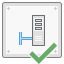

<Group title:"Compliance" owner:arcgis_python>
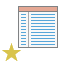

<Group title:"Customer Service, Finance, Billing and Accounting" owner:arcgis_python>
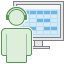

<Group title:"Demographic Content" owner:arcgis_python>
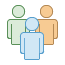

<Group title:"Design and Engineering" owner:arcgis_python>
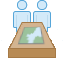

<Group title:"Disaster Response" owner:arcgis_python>
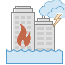

<Group title:"Executive Reports" owner:arcgis_python>
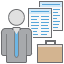

<Group title:"External Contractors" owner:arcgis_python>
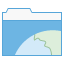

<Group title:"Featured Apps" owner:arcgis_python>
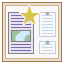

<Group title:"Field and Facility Maintenance" owner:arcgis_python>
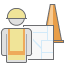

<Group title:"Fire Service" owner:arcgis_python>
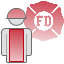

<Group title:"Gallery" owner:arcgis_python>
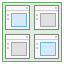

<Group title:"Industrial Monitoring" owner:arcgis_python>
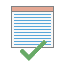

<Group title:"Lab Services" owner:arcgis_python>
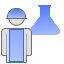

<Group title:"Land Use Content" owner:arcgis_python>
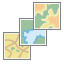

<Group title:"Network Operations" owner:arcgis_python>
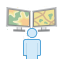

<Group title:"Public Maps and Apps" owner:arcgis_python>
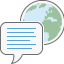

<Group title:"Tools and Add-Ins" owner:arcgis_python>
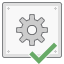

<Group title:"Wastewater Treatment" owner:arcgis_python>
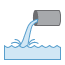

<Group title:"Water Treatment" owner:arcgis_python>
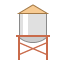

<Group title:"Web App Templates" owner:arcgis_python>
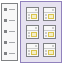

In [ ]:
for group in groups:
    display(group)